# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
import numpy as np
from dotenv import load_dotenv
import nltk as nltk
from newsapi import NewsApiClient
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Jordan\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable
load_dotenv()
api_key = os.getenv("news_api")

In [3]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [4]:
# Fetch the Bitcoin news articles
btc_news = newsapi.get_everything(q="Bitcoin", from_param="2021-06-01")

In [5]:
# Fetch the Ethereum news articles
eth_news = newsapi.get_everything(q="Ethereum",from_param="2021-06-01")

In [6]:
def get_sent_df(topic_news):
    sentiments = []
    
    for article in topic_news["articles"]:
        try:
            text = article["content"]
            date = article["publishedAt"][:10]
            sentiment = analyzer.polarity_scores(text)
            compound = sentiment["compound"]
            pos = sentiment["pos"]
            neu = sentiment["neu"]
            neg = sentiment["neg"]
        
            sentiments.append({
                "text": text,
                "date": date,
                "compound": compound,
                "positive": pos,
                "negative": neg,
                "neutral": neu
            
            })

        except AttributeError:
            pass
    
    df = pd.DataFrame(sentiments)
    cols = ["date", "text", "compound", "positive", "negative", "neutral"]
    df = df[cols]
    
    return df

In [7]:
# Create the Bitcoin sentiment scores DataFrame
btc_sentiment = get_sent_df(btc_news)
btc_sentiment.head()

,date,text,compound,positive,negative,neutral
0,2021-06-05,"Hello friends, and welcome back to Week in Rev...",0.75,0.154,0.0,0.846
1,2021-06-08,"By Mary-Ann RussonBusiness reporter, BBC News\...",0.34,0.070,0.0,0.930
2,2021-06-08,Representations of the virtual currency Bitcoi...,0.00,0.000,0.0,1.000
3,2021-06-03,"Cryptocurrencies such as bitcoin are a ""farce""...",0.00,0.000,0.0,1.000
4,2021-06-05,"In a video broadcast to Bitcoin 2021, a multid...",0.00,0.000,0.0,1.000


In [8]:
# Create the Ethereum sentiment scores DataFrame
eth_sentiment = get_sent_df(eth_news)

In [9]:
# Describe the Bitcoin Sentiment
btc_sentiment.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.223575,0.066400,0.020800,0.912850
std,0.301205,0.070866,0.037955,0.090939
min,-0.273200,0.000000,0.000000,0.728000
25%,0.000000,0.000000,0.000000,0.842250
50%,0.077150,0.056000,0.000000,0.930000
75%,0.475775,0.124000,0.016250,1.000000
max,0.750000,0.180000,0.113000,1.000000


In [10]:
# Describe the Ethereum Sentiment
eth_sentiment.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.151885,0.061100,0.023800,0.915100
std,0.337584,0.075627,0.043086,0.096037
min,-0.458800,0.000000,0.000000,0.655000
25%,0.000000,0.000000,0.000000,0.863500
50%,0.000000,0.020500,0.000000,0.929500
75%,0.416125,0.103000,0.036750,1.000000
max,0.690800,0.246000,0.151000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: btc had a higher mean positive score.

Q: Which coin had the highest compound score?

A: btc had a higher compound score.

Q. Which coin had the highest positive score?

A: btc had a higher positive score.

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [11]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [12]:
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [13]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()
# Create a list of stopwords
sw = set(stopwords.words('english'))

# Expand the default stopwords list if necessary
# YOUR CODE HERE!

In [45]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Create a tokenized list of the words
    words = word_tokenize(text)
   
    # Convert the words to lowercase
    words = [word.lower() for word in words]
#     words = list(filter(lambda word: word.lower(), words))
   # lc_words = [word.lower() for word in words if word.lower() not in sw]
    
    # Remove the punctuation from text
    words = list(filter(lambda p: p not in punctuation, words))
    
    # Remove the stop words
    words = list(filter(lambda word: word not in sw, words))
    
    # Lemmatize words into root words
#     tokens = list(filter(lambda word: lemmatizer.lemmatize(word), words))
    tokens = [lemmatizer.lemmatize(word) for word in words]
    return tokens

In [46]:
# Create a new tokens column for Bitcoin
btc_sentiment["tokens"] = btc_sentiment["text"].apply(tokenizer)
btc_sentiment.head()

,date,text,compound,positive,negative,neutral,tokens
0,2021-06-05,"Hello friends, and welcome back to Week in Rev...",0.75,0.154,0.0,0.846,"[hello, friend, welcome, back, week, review, l..."
1,2021-06-08,"By Mary-Ann RussonBusiness reporter, BBC News\...",0.34,0.070,0.0,0.930,"[mary-ann, russonbusiness, reporter, bbc, news..."
2,2021-06-08,Representations of the virtual currency Bitcoi...,0.00,0.000,0.0,1.000,"[representation, virtual, currency, bitcoin, s..."
3,2021-06-03,"Cryptocurrencies such as bitcoin are a ""farce""...",0.00,0.000,0.0,1.000,"[cryptocurrencies, bitcoin, ``, farce, '', sym..."
4,2021-06-05,"In a video broadcast to Bitcoin 2021, a multid...",0.00,0.000,0.0,1.000,"[video, broadcast, bitcoin, 2021, multiday, co..."


In [47]:
# Create a new tokens column for Ethereum
eth_sentiment["tokens"] = eth_sentiment["text"].apply(tokenizer)
eth_sentiment.head()

,date,text,compound,positive,negative,neutral,tokens
0,2021-06-03,This new mining feature is called 'Norton Cryp...,0.0000,0.000,0.000,1.000,"[new, mining, feature, called, 'norton, crypto..."
1,2021-06-04,CryptoPunks represent the only historically re...,-0.4588,0.067,0.151,0.782,"[cryptopunks, represent, historically, relevan..."
2,2021-06-01,"Yao Qian, the former head of China's digital y...",0.3612,0.070,0.000,0.930,"[yao, qian, former, head, china, 's, digital, ..."
3,2021-06-01,A consumer uses a digital yuan red envelope in...,0.0000,0.000,0.000,1.000,"[consumer, us, digital, yuan, red, envelope, m..."
4,2021-06-08,An update to an existing art app that allows a...,0.0000,0.000,0.000,1.000,"[update, existing, art, app, allows, artist, a..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [48]:
from collections import Counter
from nltk import ngrams

In [49]:
def combine_texts(tokens_df):
    result = []
    for i in tokens_df:
        result.extend(i)
    return result

In [50]:
def gen_bigrams(tokens_df): 
    bigrams = tokens_df.apply(lambda x: ngrams(x, n=2))
    bigrams = combine_texts(bigrams)
    return bigrams

In [51]:
# Generate the Bitcoin N-grams where N=2
btc_tokens = btc_sentiment["tokens"].copy()
btc_bigrams = gen_bigrams(btc_tokens.copy())
print(btc_bigrams)

[('hello', 'friend'), ('friend', 'welcome'), ('welcome', 'back'), ('back', 'week'), ('week', 'review'), ('review', 'last'), ('last', 'week'), ('week', 'wrote'), ('wrote', 'tech'), ('tech', 'taking'), ('taking', 'disney'), ('disney', 'week'), ('week', '’'), ('’', 'talking'), ('talking', 'search'), ('search', 'new'), ('new', 'crypto'), ('crypto', 'messiah'), ('messiah', 'youre'), ('youre', 'reading'), ('reading', 'tec…'), ('tec…', '+7741'), ('+7741', 'char'), ('mary-ann', 'russonbusiness'), ('russonbusiness', 'reporter'), ('reporter', 'bbc'), ('bbc', 'news'), ('news', 'image'), ('image', 'copyrightgetty'), ('copyrightgetty', 'image'), ('image', 'former'), ('former', 'u'), ('u', 'president'), ('president', 'donald'), ('donald', 'trump'), ('trump', 'told'), ('told', 'fox'), ('fox', 'business'), ('business', 'see'), ('see', 'bitcoin'), ('bitcoin', '``'), ('``', 'scam'), ('scam', "''"), ("''", 'affecting'), ('affecting', 'value'), ('value', 'u'), ('u', 'dolla…'), ('dolla…', '+3638'), ('+3638

In [52]:
# Generate the Ethereum N-grams where N=2
eth_tokens = eth_sentiment["tokens"].copy()
eth_bigrams = gen_bigrams(eth_tokens.copy())
print(eth_bigrams)

[('new', 'mining'), ('mining', 'feature'), ('feature', 'called'), ('called', "'norton"), ("'norton", 'crypto'), ('crypto', 'rolling'), ('rolling', 'tomorrow'), ('tomorrow', 'norton'), ('norton', '360'), ('360', 'user'), ('user', 'enrolled'), ('enrolled', 'norton'), ('norton', "'s"), ("'s", 'early'), ('early', 'adopter'), ('adopter', 'program'), ('program', 'norton'), ('norton', 'crypto'), ('crypto', 'enabled'), ('enabled', 'software'), ('software', 'use…'), ('use…', '+631'), ('+631', 'char'), ('cryptopunks', 'represent'), ('represent', 'historically'), ('historically', 'relevant'), ('relevant', 'narrative'), ('narrative', 'upon'), ('upon', 'value'), ('value', 'could'), ('could', 'conceivably'), ('conceivably', 'live'), ('live', 'decade'), ('decade', 'within'), ('within', 'expanding'), ('expanding', 'catalogue'), ('catalogue', 'raisonné'), ('raisonné', 'ill'), ('ill', 'damned'), ('damned', 'im'), ('im', 'counting'), ('counting', 'jack'), ('jack', 'tweet…'), ('tweet…', '+1096'), ('+1096'

In [53]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=10):
    combined = combine_texts(tokens)
    """Returns the top N tokens from the frequency count"""
    return dict(Counter(combined).most_common(N))

In [57]:
# Use token_count to get the top 10 words for Bitcoin
btc_ten = token_count(btc_tokens)
btc_ten

{'bitcoin': 21,
 'char': 20,
 'cryptocurrency': 7,
 'image': 6,
 'representation': 6,
 'illustration': 6,
 '2021': 6,
 'president': 5,
 'picture': 5,
 'taken': 5}

In [58]:
# Use token_count to get the top 10 words for Ethereum
eth_ten = token_count(eth_tokens)
eth_ten

{'char': 20,
 'ethereum': 7,
 'crypto': 6,
 'digital': 6,
 'bitcoin': 6,
 'market': 5,
 'cryptocurrencies': 5,
 "'s": 4,
 'representation': 4,
 'seen': 4}

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [59]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

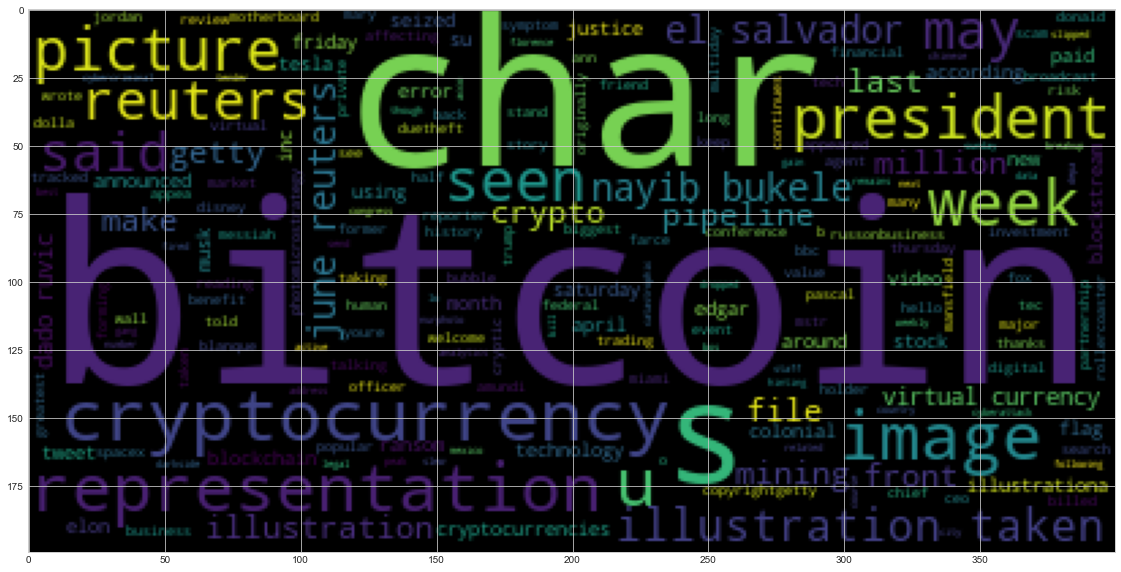

In [66]:
# Generate the Bitcoin word cloud
btc_comb = combine_texts(btc_tokens.copy())
btc_wc = WordCloud().generate(" ".join(btc_comb))
plt.imshow(btc_wc)

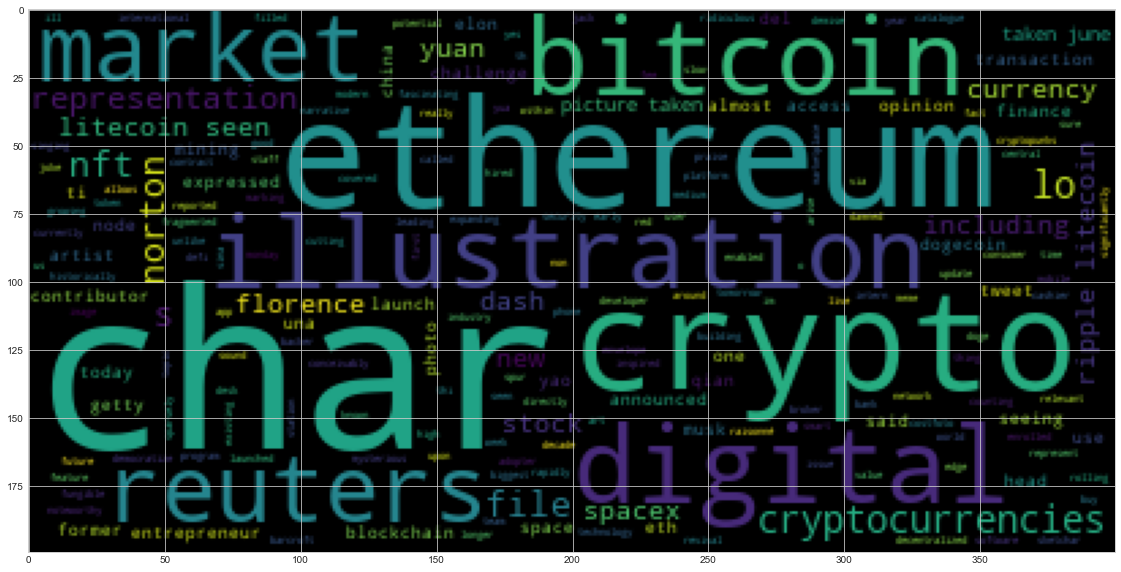

In [67]:
# Generate the Ethereum word cloud
eth_comb = combine_texts(eth_tokens.copy())
eth_wc = WordCloud().generate(" ".join(eth_comb))
plt.imshow(eth_wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [28]:
import spacy
from spacy import displacy

In [29]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [63]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [76]:
# Concatenate all of the Bitcoin text together
#btc_comb
btc_texts = btc_sentiment["text"].copy()
btc_text = combine_texts(btc_texts)

In [77]:
# Run the NER processor on all of the text
btc_doc = nlp(" ".join(btc_texts))

# Add a title to the document
btc_doc.user_data["title"] = "Bitcoin NER"

In [78]:
# Render the visualization
displacy.render(btc_doc, style='ent')

In [82]:
# List all Entities
btc_entities = [ent.text for ent in btc_doc.ents]
print(btc_entities)

['Last week', 'Disney', 'This week', 'Tec', 'Mary-Ann RussonBusiness', 'BBC News', 'US', 'Donald Trump', 'Fox Business', 'Bitcoin', 'US', 'Bitcoin', 'May 20, 2021', 'Amundi', 'Pascal Blanque', 'Thursday', 'Bitcoin', 'around $39', '2021', 'Miami', 'Nayib Bukele', "El Salvador's", 'DueTheft', 'Bitcoin', 'Getty', 'Bitcoin', 'Friday', 'Tesla', 'Elon Musk', 'seized over half', '$4.4 million', 'Colonial Pipeline', 'Mays', 'U.S.', 'Depa', 'Reuters', 'MEXICO CITY', 'June 5', 'Reuters', 'Nayib Bukele', 'Saturday', 'Congress', 'next week', 'Chinese', 'June 2, 2021', 'Florence Lo', 'NurPhoto', 'Getty Images', '47%', 'April 15', '1.36 million', 'around 716,000', 'Sunday', 'Bitcoin', 'more than 3%', 'Friday', 'Elon Musk', 'weekly', 'about a month', 'Bitcoin', 'June 7, 2021', 'Edgar Su/IllustrationBitcoin', 'three-week', 'Tuesday', 'China', 'April 9, 2019', 'Dado Ruvic', 'Blockstream Mining', 'Saturday', 'Square Inc', '$5 million', 'Blockstream', 'Andia/Getty Images', 'Crypto', 'May', 'Bitcoin', 'Ju

---

### Ethereum NER

In [81]:
# Concatenate all of the Ethereum text together
eth_texts = eth_sentiment["text"].copy()
eth_text = combine_texts(eth_texts)

In [89]:
# Run the NER processor on all of the text
eth_doc = nlp("".join(eth_text))

# Add a title to the document
eth_doc.user_data["title"] = "Ethereum NER"

In [90]:
# Render the visualization
displacy.render(eth_doc, style='ent')

In [91]:
# List all Entities
eth_entities = [ent.text for ent in eth_doc.ents]
print(eth_entities)

['tomorrow', 'Norton', 'Norton', 'Norton Crypto', 'decades', 'Ill', 'Jacks', 'Qian', 'China', 'Sina Finance', 'Monday', 'Costfoto', 'Barcroft Media', 'Getty Images', 'Yao Qian', 'China', 'NFT', 'NFT', 'Ethereum’s', '+1175', 'Reuters', 'Bitcoin, Dash, Ethereum, Ripple and Litecoin', 'June 2, 2021', 'Florence Lo/', 'Bitcoin, Dash, Ethereum, Ripple and Litecoin', 'June 2, 2021', 'Florence Lo/Illustration', 'Entrepreneur', 'Entrepreneur', 'DeFi', 'Spur', 'Dogecoin', 'Doge', 'Elon Musk', 'chars]This week', 'Ethereum (ETH', 'the International Space Station (ISS', 'first', 'ETH', 'Nvidia', 'two', '30', '3080', 'NFT', 'Getty', 'Bitcoin', 'Friday', 'Tesla', 'Elon Musk', 'Bitcoin to Dogecoin', 'Bitcoin, Dash, Ethereum, Ripple and Litecoin', 'June 2, 2021', 'Florence Lo/Illustration/File PhotoThe Whi', 'Bitcoin', 'January 8, 2021', 'Dado Ruvic/File Photo/File PhotoCryptocurrencies', 'British', 'today', 'SC Ventures']


---